In [1]:
#Vtk generation
import flopy ## Org
from mf6Voronoi.tools.vtkGen import Mf6VtkGenerator ## Org
from mf6Voronoi.utils import initiateOutputFolder ## Org

In [2]:
import os
os.listdir('../../../../mf6models')
#!pip install -U flopy --break-system-packages

['ex-gwf-advtidal',
 'ex-gwf-bcf2ss-p01a',
 'ex-gwf-fhb',
 'ex-gwf-toth',
 'ex-gwf-twri01',
 'hillslopeModel',
 'openPit',
 'regionalModel']

In [3]:
# load simulation
simName = 'mf6Sim' ## Org
modelName = 'mf6Model' ## Org
modelWs = '../../../../mf6models/hillslopeModel' ## Org
sim = flopy.mf6.MFSimulation.load(sim_name=simName, version='mf6', ## Org
                             exe_name='bin/mf6.exe', ## Org
                             sim_ws=modelWs) ## Org

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package obs...
    loading package oc...
    loading package ghb...
    loading package drn...
    loading package rch...
    loading package evt...
  loading solution package modflow...


In [4]:
gwf = sim.get_model('modflow') ## Org

In [5]:
head = gwf.output.head().get_data()
bud = gwf.output.budget()
spdis = bud.get_data(text='DATA-SPDIS')[0]
spdis


rec.array([( 1394,  1394, 0.,  0.00000000e+00,  0.00000000e+00, -6.84931507e-09),
           ( 1395,  1395, 0.,  0.00000000e+00,  0.00000000e+00, -6.84931507e-09),
           ( 1449,  1449, 0.,  0.00000000e+00,  0.00000000e+00, -6.84931507e-09),
           ...,
           (93940, 93940, 0., -8.77003095e-08, -2.14881587e-09, -1.38184814e-09),
           (93941, 93941, 0., -6.91409651e-08, -1.31522446e-08, -1.33517775e-09),
           (93942, 93942, 0., -5.69933998e-08, -4.49280967e-08, -1.31105314e-09)],
          dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8'), ('qx', '<f8'), ('qy', '<f8'), ('qz', '<f8')])

In [6]:
import numpy as np
hactive = head[head>gwf.hdry]
hactive = head[head<gwf.hnoflo]
levels = np.linspace(hactive.min(),hactive.max(),10)
levels


array([1.87175987e-05, 1.27022595e+01, 2.54045003e+01, 3.81067410e+01,
       5.08089818e+01, 6.35112226e+01, 7.62134633e+01, 8.89157041e+01,
       1.01617945e+02, 1.14320186e+02])

In [7]:
backgroundImageDict = {
    'fig':'Png/backgroundImage.png',
    'wrl':'Png/backgroundImage.pgw'
}

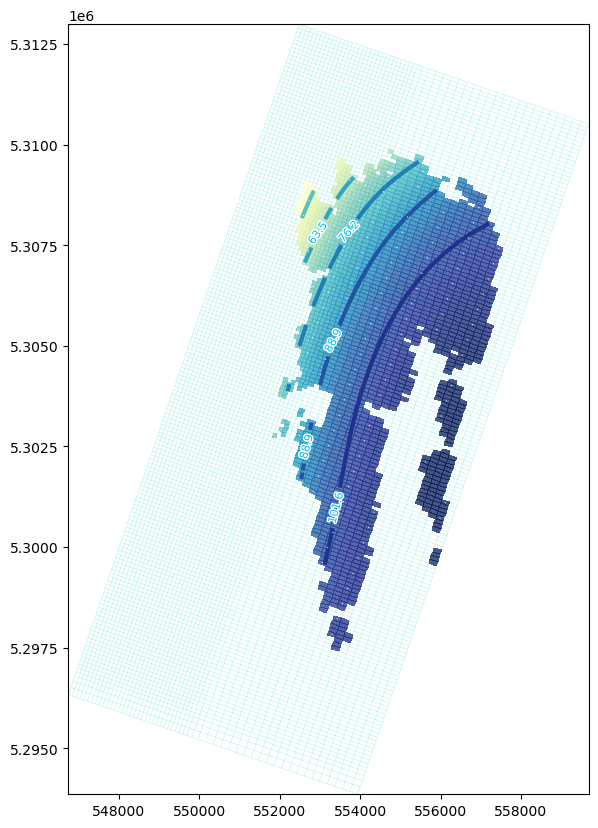

In [8]:
from mf6Voronoi.tools.graphs2d import FlowVectorGenerator
FlowVectorGenerator(gwf, layer=1, plotGrid=True, scale=1e+10000)